In [2]:
## generate graph
import numpy as np
import json 
import networkx as nx
import matplotlib 

In [117]:
"""
README

readdata: read the data into env
genereatedata: generate data and weight,
data is 2d list, [[],[],[]], describing connectivity
weight is also 2d list, the same shape as data, describing weight
other functions are test the correctness of data.
"""

def readdata(filename):
    """
    :type: filename: string [input file.]
    :rtype: [[List]]
    """
    with open(filename, 'r') as f:
        tmpmap = json.load(f)
    return tmpmap['adjacent'],tmpmap['adjweight'], tmpmap['edgeweight'], tmpmap['graphinfo']

def genereatedata(N, dumpdata=False,filename=None):
    """
    :type: N: integer [vertex Number.]
    :type: dumpdata: Whether we want to save the data. default False
    :type: filename: if we want to save data, filename is ? save to the same dir.
    :rtype: None
    """
    vertex = np.arange(N)
    np.random.shuffle(vertex) # vertex count 
    data = [[] for i in range(N)] # connect relation
    weight = [[] for i in range(N)] # weight value
    edgeweight = [] # edge weight [[5,6,7...],[2,3,4...],[7,8,9...]]
    for i in range(vertex.shape[0]):
        p = np.random.uniform(size=1)[0] # how many out degree
        outdegree = int(p*(N-i-1)) # how many out degree
        if outdegree == 0:
            continue
        for j in np.random.permutation(np.arange(i+1, N))[:outdegree]:
            data[i].append(vertex[j]) # conect 
        weight[i].extend(np.random.randint(low=1,high=1024,size=outdegree))
    retdata = [None for i in range(N)]
    retweight = [None for i in range(N)]
    for i in range(len(data)):
        retdata[vertex[i]] = data[i]
        retweight[vertex[i]] = weight[i]
    edgenumber = 0
    for i in range(len(retdata)):
        for j in range(len(retdata[i])):
            retdata[i][j] = int(retdata[i][j])
            retweight[i][j] = int(retweight[i][j])
            edgeweight.append([i,j,retweight[i][j]])
            edgenumber += 1
    graphinfo = {}
    graphinfo['edgenumber'] = edgenumber
    graphinfo['vertexnumber'] = len(retdata)
    if dumpdata:
        assert(filename)
        with open(filename, 'w') as f:
            tmpmap = {}
            tmpmap ["adjacent"] = retdata
            tmpmap ["adjweight"] = retweight
            tmpmap ["edgeweight"] = edgeweight
            tmpmap ["graphinfo"] = graphinfo
            json.dump(tmpmap, f)
    return retdata,retweight,edgeweight,graphinfo

def check_rightness(start, end, your_result, retdata, retweight):
    G = toG(retdata, retweight)
    sppinfo = nx.all_pairs_dijkstra(G)
    rightness = True
    assert(start in sppinfo.keys() and end in sppinfo.keys())
    if end not in sppinfo[start][0].keys():
        if your_result == None:
            print("Correct")
        else:
            rightness = False
            print("Wrong")
    else:
        assert(your_result != None)
        assert(type(your_result) == type([]))
        for i in range(len(sppinfo[start][1])):
            if(sppinfo[start][i] != end):
                print("Wrong")
                rightness = False
            break
        if rightness:
            print("Correct")
        else:
            print("Wrong")
    return rightness
    
def toG(ret, weight):
    """
    to G of networkx
    """
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(len(ret))])
    for i in range(len(ret)):
        for j in range(len(ret[i])):
            G.add_edge(i,ret[i][j],weight=weight[i][j])
    return G

def check_dag():
    for i in range(100):
        ret,weight,edgeweight,graphinfo = genereatedata(100)
        G = toG(ret,weight)
        if not nx.algorithms.dag.is_directed_acyclic_graph(G):
            print("wrong")

In [118]:
check_dag() #Check that our generated graph is a DAG.

In [119]:
# means generate 10 vertex
ret,weight,edgeweight,graphinfo = genereatedata(10, True, "dataset1")

In [120]:
# read dataset
adjacent, adjacentweight, edgeweight, graphinfo = readdata('dataset1')
print("edge wegiht:\n",edgeweight)
print("adjacent matrix:\n",adjacent)
print("adjacent weight:\n",adjacentweight)

edge wegiht:
 [[0, 0, 965], [0, 1, 405], [4, 0, 901], [4, 1, 188], [6, 0, 780], [6, 1, 84], [6, 2, 611], [6, 3, 169], [6, 4, 566], [7, 0, 499], [7, 1, 240], [7, 2, 49], [9, 0, 143]]
adjacent matrix:
 [[8, 1], [], [], [], [9, 8], [], [1, 5, 4, 2, 0], [2, 1, 4], [], [1]]
adjacent weight:
 [[965, 405], [], [], [], [901, 188], [], [780, 84, 611, 169, 566], [499, 240, 49], [], [143]]


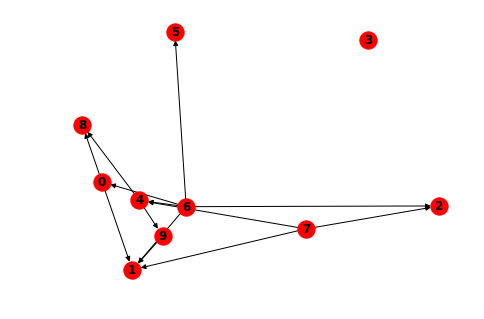

In [121]:
# change G to 
G = toG(adjacent, adjacentweight)
# draw G
nx.draw(G, with_labels=True, font_weight='bold')

In [124]:
sppinfo = dict(nx.all_pairs_dijkstra(G))
print(sppinfo)

{0: ({0: 0, 1: 405, 8: 965}, {0: [0], 8: [0, 8], 1: [0, 1]}), 1: ({1: 0}, {1: [1]}), 2: ({2: 0}, {2: [2]}), 3: ({3: 0}, {3: [3]}), 4: ({4: 0, 8: 188, 9: 901, 1: 1044}, {4: [4], 9: [4, 9], 8: [4, 8], 1: [4, 9, 1]}), 5: ({5: 0}, {5: [5]}), 6: ({6: 0, 5: 84, 2: 169, 0: 566, 4: 611, 1: 780, 8: 799, 9: 1512}, {6: [6], 1: [6, 1], 5: [6, 5], 4: [6, 4], 2: [6, 2], 0: [6, 0], 8: [6, 4, 8], 9: [6, 4, 9]}), 7: ({7: 0, 4: 49, 8: 237, 1: 240, 2: 499, 9: 950}, {7: [7], 2: [7, 2], 1: [7, 1], 4: [7, 4], 9: [7, 4, 9], 8: [7, 4, 8]}), 8: ({8: 0}, {8: [8]}), 9: ({9: 0, 1: 143}, {9: [9], 1: [9, 1]})}


In [68]:
# algorithm 1
# djkstra
